# Some useful tips in iPython for CMS 


We first import three useful libraries
1. numpy (matrix algebra and more):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. scipy.stats for statistical tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# this line plots graphs in line
%matplotlib inline

we now create a vector manually

In [3]:
x=np.array([0,1,2,3,4,5])
print x

[0 1 2 3 4 5]


we can also use arange

In [4]:
xx=np.arange(0,3,.2)
print xx

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8]


print shape of vector

In [5]:
x.shape

(6,)

we now define $y$ as a function of $x$, 
$$y(x)=x^2$$ 

In [6]:
y = x**2
print y

[ 0  1  4  9 16 25]


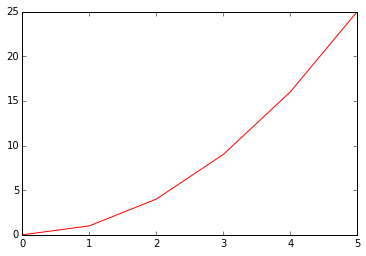

In [7]:
plt.figure()
plt.plot(x,y,'r')
plt.show()

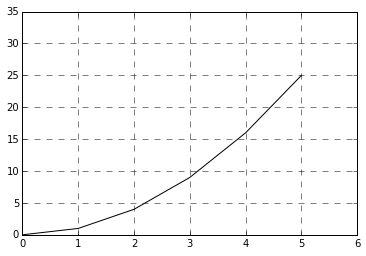

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y,'k')
ax.set_xlim((0,6))
ax.set_ylim((0,35))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
#ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [9]:
yy=np.dot(xx,xx)
print yy

40.6


In [10]:
np.dot(x,x)

55

In [11]:
np.sum(y)


55

## Matrices and Linear Algebra

In [12]:
X=np.matrix([2,3])
W=np.matrix([1,2])

In [13]:
X*X.T


matrix([[13]])

In [14]:
np.dot(X.T,X)

matrix([[4, 6],
        [6, 9]])

## Pearson correlation

In [15]:
# example 1
stats.pearsonr([1,2,3],[1,2,3.1])

(0.99962228516121843, 0.017498096813278487)

In [16]:
#example 2
stats.pearsonr([1,2,3,4,5,6],[2,4,10,8,10,12])

(0.90886906843896254, 0.012078855823236475)

In [17]:
#example 3
stats.pearsonr([1,2,3,4,5,6],[6,5,4,3,2,1])

(-1.0, 0.0)

In [18]:
#example 4
stats.pearsonr([1,2,3,4,5,6],[1,2,3,3,2,1])

(0.0, 1.0)

## Random Variables that are linearly related

Pearson Coefficient =  (0.97640667778136792, 4.7860960691644082e-67)


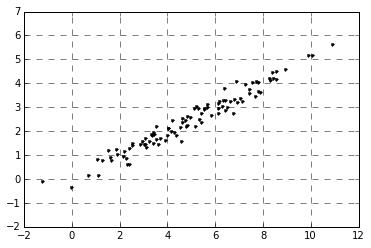

In [19]:
# we first produce some data whose scatter plot 
# exhibits a linear relationship
# y = mx + c or y = x
N=100
y_sigma=.25   # variance for y feature
x_sigma=np.sqrt(5.0)   # variance for X feature
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma+5   #Gaussian and shift
#x = np.arange(0,10,.02)
N=len(x)
y = np.copy(x)/2.0+np.random.randn(N)*y_sigma # line equation + gaussian noise
print 'Pearson Coefficient = ',stats.pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-2,12))
ax.set_ylim((-2,7))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

## Random Variables that are non-linearly related

Pearson Coefficient =  (0.12693164513503377, 5.6176480107482992e-23)


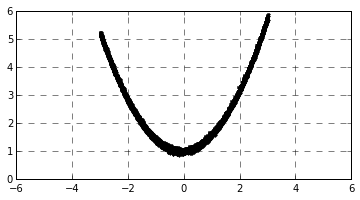

In [20]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = x
y_sigma=0.05
x = np.random.randn(N)*x_sigma
x = np.arange(-3,3,.001)
N=len(x)
y= 0.5*x*x + 0.1*x + 1 + np.random.randn(N)*y_sigma
#y = np.copy(x)/2.0+np.random.randn(N)*y_sigma
print 'Pearson Coefficient = ',stats.pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-6,6))
ax.set_ylim((0,6))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

## Distributions and Histograms

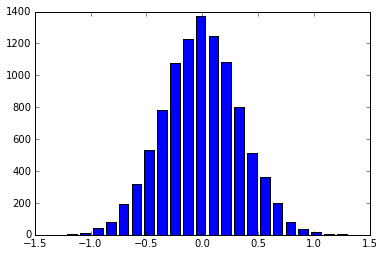

In [21]:
# generate numbers guassian distributed, centred at zero
sigma=0.3450  #standard deviation
np.random.seed(1)
X1=np.random.randn(10000)*sigma
# generate histogram
x_bin=np.arange(-4.0*sigma,3.5*sigma,sigma/3.0)+sigma/2.0
h,b=np.histogram(X1,bins=x_bin)
#print h,b
plt.bar(b[:-1],h,width=sigma/4.0)
plt.show()
#print x_bin

In [22]:
# calculate mean and sigma
print 'Mean=',np.mean(X1)
print 'variance = ',np.std(X1)**2.0
print 'standard deviation = ',np.std(X1)

Mean= 0.00337156656119
variance =  0.118736145554
standard deviation =  0.344581116072


In [23]:
X2=np.random.normal(loc=0.0,scale=0.345,size=100000)  # scale is standard deviation
print 'Mean=',np.mean(X2)
print 'variance = ',np.std(X2)**2.0
print 'standard deviation = ',np.std(X2)
print 'variance = ',np.var(X2)

Mean= 0.00112914225612
variance =  0.11860792853
standard deviation =  0.344395018155
variance =  0.11860792853


## Chi-Square goodness-of-fit

In [24]:
# Table for chi-square
print("Critical value")

for k in range(1,11):
    crit = stats.chi2.ppf(q = 1.0-np.array([0.01, .05]), # Find the critical value for 99% and 95% confidence*
                          df = k)   # Df = number of variable categories - 1

    print(k, crit)


Critical value
(1, array([ 6.6348966 ,  3.84145882]))
(2, array([ 9.21034037,  5.99146455]))
(3, array([ 11.34486673,   7.8147279 ]))
(4, array([ 13.27670414,   9.48772904]))
(5, array([ 15.08627247,  11.07049769]))
(6, array([ 16.81189383,  12.59158724]))
(7, array([ 18.47530691,  14.06714045]))
(8, array([ 20.09023503,  15.50731306]))
(9, array([ 21.66599433,  16.9189776 ]))
(10, array([ 23.20925116,  18.30703805]))


In [25]:
f_observed=np.array([30,20,35,36,17,14,29,20,18,31],dtype=float)  # reject
f_observed=np.array([30,25,25,30,17,14,29,20,18,31],dtype=float)  # assume similar

N=len(f_observed)
f_expected = np.full_like(f_observed,np.sum(f_observed)/N)
#
chi_2_obt = np.sum(((f_expected-f_observed)*(f_expected-f_observed))/f_expected)
print 'chi_2_obt=',chi_2_obt
#
chi_2=stats.chi2.ppf(q=1.0-.05,df=N-1)
print 'chi_2 from table = ', chi_2
#
if chi_2_obt>chi_2:
    print "We reject the hypothesis that the two distributions are similar with a confidence of 95%"
else:
    print "We assume that the distributions are similar with a confidence of 95%"

chi_2_obt= 14.5983263598
chi_2 from table =  16.9189776046
We assume that the distributions are similar with a confidence of 95%


# t-Test

In [26]:
stats.t.ppf(q=1-0.025,  # Quantile to check
            df=2200)  # Degrees of freedom

1.9610428730457048

In [27]:
stats.ttest_1samp(a= [50,75,65,72,68,65,73,59,64], popmean= 75.0)

Ttest_1sampResult(statistic=-3.6147844564602538, pvalue=0.0068340802114004407)

# One-way ANOVA

## Anova - Manual

In [28]:
# A study on Perceived difficulty [from Heiman-92]
# We told three samples of five subjects each that some
# math problems were easy (A1), of medum difficulty (A2), or difficult (A3)
# we measured the number of problems they correctly solved
# we want to check for significant difference between these groups

In [29]:
# measurements(scores obtained) are given below for the three samples
A1 = np.array([9,12,4,8,7],dtype=float)
A2 = np.array([4,6,8,2,10],dtype=float)
A3 = np.array([1,3,4,5,2],dtype=float)

## Anova - Python Library

In [30]:
print stats.f_oneway(A1,A2,A3)

F_onewayResult(statistic=4.5238095238095228, pvalue=0.034345483028682462)


In [31]:
stats.f.sf(4.52, dfn=2, dfd=12, loc=0, scale=1)

0.034420174155648145

In [32]:
# calculating f_critical
def get_f_crit(alpha,n,d):
    #rv=stats.f(n,d)
    x=1.0
    while (stats.f.sf(x,n,d)>alpha) and x<10.0:
        x+=0.001
    return x

In [33]:
print get_f_crit(0.05,100,13)

2.262


In [34]:
rv=stats.f(2,12)
rv.sf(4.52)

0.034420174155648145

## Calculator - use this space for arbitrary computations

In [35]:
5.67*13.2

74.844

## More Help

<http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/t0b_intro_to_jupyter_notebooks.html>

<http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html>

<http://docs.mathjax.org/en/latest/index.html>

<https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet>

<http://hamelg.appspot.com>